# Autoencoder

Based on Keras blog created by Francois Chollet.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM 
from keras.models import Model
from keras.datasets import mnist

Using TensorFlow backend.


# Loading in dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
del y_train
del y_test

# scale data between 0 and 1
x_train = x_train.astype('float32') / 256
x_test = x_test.astype('float32') / 256

# Reshape data
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


# 1)- Simple autoencoder

In [3]:
input_layer = Input(shape=(784,))
# encoded layer. compresses data by the factor 12.25 (784/64=12.25)
encoded = Dense(64, activation='relu')(input_layer)
# decoded layer. reconstructs the input (units are equal to the input dimension of the image)
decoded = Dense(784, activation='sigmoid')(encoded)

Instructions for updating:
Colocations handled automatically by placer.


## Creating model

In [0]:
# maps an input to its reconstruction
autoencoder = Model(input_layer, decoded)

# maps an input to its encoded representation
encoder = Model(input_layer, encoded)

In [0]:
# for the decoder, we need to create an input layer which has the dimensionality of the encoded layer
input_layer_dec = Input(shape=(64,))
# retrieve the last layer of the autoencoder model and place it after the input layer
decoder_layer = autoencoder.layers[-1](input_layer_dec)

decoder = Model(input_layer_dec, decoder_layer)

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=50,
                batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.3552 - val_loss: 0.2691
Epoch 2/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2600 - val_loss: 0.2470
Epoch 3/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2355 - val_loss: 0.2224
Epoch 4/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.2146 - val_loss: 0.2049
Epoch 5/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1998 - val_loss: 0.1924
Epoch 6/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1889 - val_loss: 0.1829
Epoch 7/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1804 - val_loss: 0.1753
Epoch 8/50
60000/60000 [==============================] - 1s 16us/step - loss: 0.1733 - val_loss: 0.1687
Epoch 9/50
60000/60000 [==============================] - 1s 1

In [0]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images) # takes the output from the encoder as input

## Results

In [0]:
def visualize_data(data, size):
    n = 10 # number of digits that will be displayed
    plt.figure(figsize=(20, 4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(data[i].reshape(size, size)) # reshape the image back to its normal shape
        # disable axis
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

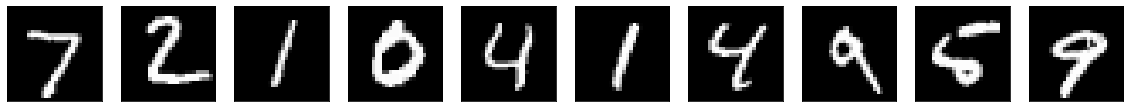

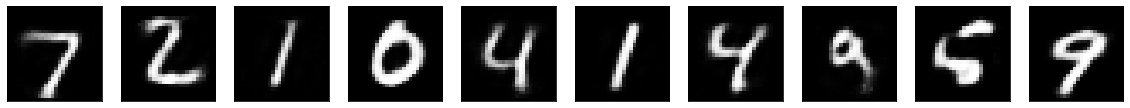

In [9]:

visualize_data(x_test, 28)
visualize_data(decoded_images, 28)

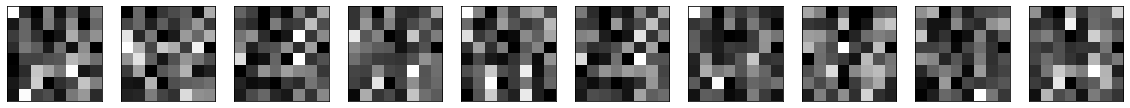

In [10]:
visualize_data(encoded_images, 8)

# 2)-Deep autoencoder

In [0]:
input_layer = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.3292 - val_loss: 0.2643
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2543 - val_loss: 0.2389
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2256 - val_loss: 0.2116
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2021 - val_loss: 0.1911
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.1853 - val_loss: 0.1777
Epoch 6/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.1740 - val_loss: 0.1687
Epoch 7/100
60000/60000 [==============================] - 1s 21us/step - loss: 0.1673 - val_loss: 0.1653
Epoch 8/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1624 - val_loss: 0.1580
Epoch 9/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.1574 - val_loss: 0.1

In [0]:
autoencoded_images = autoencoder.predict(x_test)

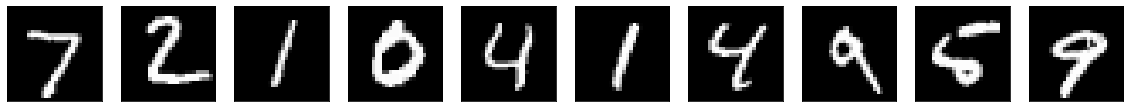

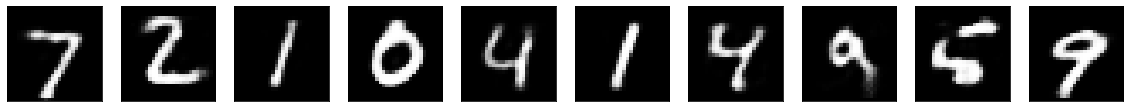

In [14]:
visualize_data(x_test, 28)
visualize_data(autoencoded_images, 28)

# 3)-Convolutional autoencoder

In [15]:
# Reshape data for Convolutional Layer
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [0]:
input_layer = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# encoded representation is (4, 4, 8) i.e. 128-dimensional 

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adadelta')

In [18]:
autoencoder.fit(x_train, x_train, epochs=50, 
                batch_size=128, shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.2117 - val_loss: 0.1763
Epoch 2/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1604 - val_loss: 0.1478
Epoch 3/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1453 - val_loss: 0.1372
Epoch 4/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1364 - val_loss: 0.1306
Epoch 5/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1307 - val_loss: 0.1303
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1266 - val_loss: 0.1231
Epoch 7/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1235 - val_loss: 0.1214
Epoch 8/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1211 - val_loss: 0.1184
Epoch 9/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1192 - val_loss: 0.1233
Epoch

In [0]:
autoencoded_images = autoencoder.predict(x_test)

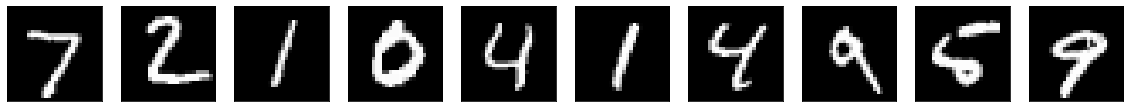

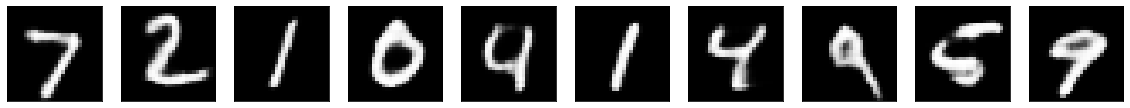

In [20]:
visualize_data(x_test, 28)
visualize_data(autoencoded_images, 28)

# 4)-Image denoising

### Creating noisy data

In [0]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

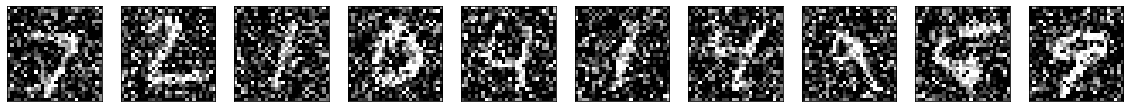

In [22]:
visualize_data(x_test_noisy, 28)

### improving the quality of the image

In [0]:
input_layer = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [25]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, 
                batch_size=128, shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.1833 - val_loss: 0.1284
Epoch 2/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1203 - val_loss: 0.1117
Epoch 3/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1124 - val_loss: 0.1067
Epoch 4/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1086 - val_loss: 0.1048
Epoch 5/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1062 - val_loss: 0.1036
Epoch 6/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1046 - val_loss: 0.1024
Epoch 7/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1035 - val_loss: 0.1016
Epoch 8/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.1027 - val_loss: 0.1015
Epoch 9/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1020 - val_loss: 0.1

In [0]:
denoised_data = autoencoder.predict(x_train_noisy)

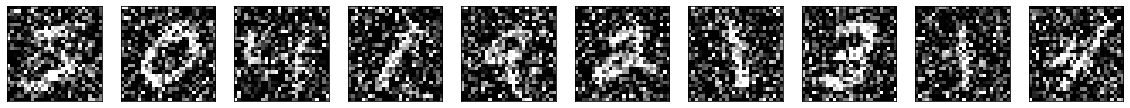

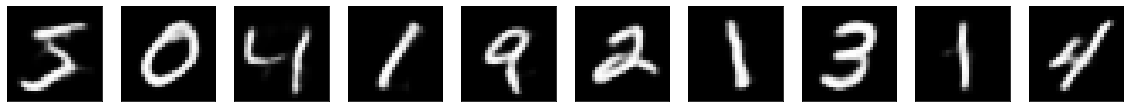

In [27]:
visualize_data(x_train_noisy, 28)
visualize_data(denoised_data, 28)